# Exploring the dataset

In [16]:
# import all necessary libraries for exploration and visualization
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import helper_functions as vs
from time import time
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier

%matplotlib inline

### Load and make a copy of the data

In [17]:
data = pd.read_csv('hotel_booking.csv')
hotel_bookings = data.copy()

### View general information of dataset

In [18]:
hotel_bookings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 36 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

> We can see that almost all columns have no null entries. Although children, country, agent, and company features all have null values which must be dealt with before supervised learning model is applied to data. 

In [19]:
hotel_bookings.isna().sum()

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company         

>This shows the number of null values for features. Again, these null values must be dealt with before developing any predictive algorithms.

### Looking at description of numerical information

In [28]:
hotel_bookings.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,...,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests,stay_length
count,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119386.000000,119390.000000,...,119390.000000,119390.000000,119390.000000,103050.000000,6797.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000
mean,0.370416,104.011416,2016.156554,27.165173,15.798241,0.927599,2.500302,1.856403,0.103890,0.007949,...,0.087118,0.137097,0.221124,86.693382,189.266735,2.321149,101.831122,0.062518,0.571363,3.427900
std,0.482918,106.863097,0.707476,13.605138,8.780829,0.998613,1.908286,0.579261,0.398561,0.097436,...,0.844336,1.497437,0.652306,110.774548,131.655015,17.594721,50.535790,0.245291,0.792798,2.557439
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,1.000000,6.000000,0.000000,-6.380000,0.000000,0.000000,0.000000
25%,0.000000,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,9.000000,62.000000,0.000000,69.290000,0.000000,0.000000,2.000000
50%,0.000000,69.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,14.000000,179.000000,0.000000,94.575000,0.000000,0.000000,3.000000
75%,1.000000,160.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,229.000000,270.000000,0.000000,126.000000,0.000000,1.000000,4.000000
max,1.000000,737.000000,2017.000000,53.000000,31.000000,19.000000,50.000000,55.000000,10.000000,10.000000,...,26.000000,72.000000,21.000000,535.000000,543.000000,391.000000,5400.000000,8.000000,5.000000,69.000000


>This gives us some interesting information on numerical data. Some features to make note of: \
    - is_repeated_guest may be worth looking at further (binary classification) \
    - previous_bookings_not_canceled, booking_changes may be worth further investigation \
    - agent and company features are regarded as numerical in this table, but are more aptly described as categorical using numbers \
    - adr has a negative value for minimum (may need to be addressed)

### Looking at guest nationalities for bookings

In [21]:
# return the 10 largest counts for country
hotel_bookings.groupby('country').country.count().nlargest(10)

country
PRT    48590
GBR    12129
FRA    10415
ESP     8568
DEU     7287
ITA     3766
IRL     3375
BEL     2342
BRA     2224
NLD     2104
Name: country, dtype: int64

In [22]:
# find the percentage each nationality makes up of the whole
hotel_bookings.groupby('country').country.count().nlargest(10) / hotel_bookings.shape[0]

country
PRT    0.406986
GBR    0.101591
FRA    0.087235
ESP    0.071765
DEU    0.061035
ITA    0.031544
IRL    0.028269
BEL    0.019616
BRA    0.018628
NLD    0.017623
Name: country, dtype: float64

> We can see that guests from Portugal make over 40% of the bookings in our hotel dataset. This is logical due to the location we are given for the hotels. The hotels are located in the Algarve region in Portugal and in the city of Lisbon. This feature will need to be dropped because it is disproportionately distributed and is a consequence of the hotel location rather than a valid predictor of cancellations.

# Exploring null values

### Looking at values for agent and company features

In [25]:
hotel_bookings[['agent', 'company']].sample(10)

,agent,company
33116,171.0,NaN
26376,241.0,NaN
37733,240.0,NaN
8250,240.0,NaN
99582,132.0,NaN
45701,29.0,NaN
1436,240.0,NaN
90319,14.0,NaN
104691,9.0,NaN
38862,240.0,NaN


In [26]:
hotel_bookings['company'].unique()

array([ nan, 110., 113., 270., 178., 240., 154., 144., 307., 268.,  59.,
       204., 312., 318.,  94., 174., 274., 195., 223., 317., 281., 118.,
        53., 286.,  12.,  47., 324., 342., 373., 371., 383.,  86.,  82.,
       218.,  88.,  31., 397., 392., 405., 331., 367.,  20.,  83., 416.,
        51., 395., 102.,  34.,  84., 360., 394., 457., 382., 461., 478.,
       386., 112., 486., 421.,   9., 308., 135., 224., 504., 269., 356.,
       498., 390., 513., 203., 263., 477., 521., 169., 515., 445., 337.,
       251., 428., 292., 388., 130., 250., 355., 254., 543., 531., 528.,
        62., 120.,  42.,  81., 116., 530., 103.,  39.,  16.,  92.,  61.,
       501., 165., 291., 290.,  43., 325., 192., 108., 200., 465., 287.,
       297., 490., 482., 207., 282., 437., 225., 329., 272.,  28.,  77.,
       338.,  72., 246., 319., 146., 159., 380., 323., 511., 407., 278.,
        80., 403., 399.,  14., 137., 343., 346., 347., 349., 289., 351.,
       353.,  54.,  99., 358., 361., 362., 366., 37

In [27]:
hotel_bookings['agent'].unique()

array([ nan, 304., 240., 303.,  15., 241.,   8., 250., 115.,   5., 175.,
       134., 156., 243., 242.,   3., 105.,  40., 147., 306., 184.,  96.,
         2., 127.,  95., 146.,   9., 177.,   6., 143., 244., 149., 167.,
       300., 171., 305.,  67., 196., 152., 142., 261., 104.,  36.,  26.,
        29., 258., 110.,  71., 181.,  88., 251., 275.,  69., 248., 208.,
       256., 314., 126., 281., 273., 253., 185., 330., 334., 328., 326.,
       321., 324., 313.,  38., 155.,  68., 335., 308., 332.,  94., 348.,
       310., 339., 375.,  66., 327., 387., 298.,  91., 245., 385., 257.,
       393., 168., 405., 249., 315.,  75., 128., 307.,  11., 436.,   1.,
       201., 183., 223., 368., 336., 291., 464., 411., 481.,  10., 154.,
       468., 410., 390., 440., 495., 492., 493., 434.,  57., 531., 420.,
       483., 526., 472., 429.,  16., 446.,  34.,  78., 139., 252., 270.,
        47., 114., 301., 193., 182., 135., 350., 195., 352., 355., 159.,
       363., 384., 360., 331., 367.,  64., 406., 16

> All names of agents and companies have been converted to a numerical IDs to protect their identity. My proposition is to convert these categories into a binary classification. Bookings with and agent will be represented by a 1 and without an agent with a 0. The same binary classification will apply to the company feature. 

In [29]:
hotel_bookings[hotel_bookings.adr < 0]

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,name,email,phone-number,credit_card,stay_length
14969,Resort Hotel,0,195,2017,March,10,5,4,6,2,...,-6.38,0,0,Check-Out,2017-03-15,Chase Santos,Chase_Santos@outlook.com,472-408-0661,************9176,10


> It appears this one value of adr < 0 is a single outlier which won't affect our analysis. 

## Create arrival_date column

> This datetime object can be used to make calculations between dates (i.e. reservation_status_date)

### Convert month name to month number using dictionary of month conversions

In [30]:
month_conv = {"January":1, "February":2, "March":3, 
              "April":4, "May":5, "June":6, 
              "July":7, "August":8, "September":9,
              "October":10, "November":11, "December":12}
hotel_bookings["arrival_date_month_conv"] = hotel_bookings.arrival_date_month.apply(lambda x: month_conv[x])

In [31]:
hotel_bookings[["arrival_date_month", "arrival_date_month_conv"]].sample(10)

,arrival_date_month,arrival_date_month_conv
21003,February,2
71128,June,6
85423,March,3
34350,March,3
15414,August,8
14160,April,4
90608,June,6
20041,January,1
116258,July,7
6288,June,6


### Create datetime column by combing arrival_date_day_of_month, arrival_date_month_conv, and arrival_date_year

In [33]:
hotel_bookings['arrival_date'] = pd.to_datetime(dict(year=hotel_bookings.arrival_date_year,
                                                     month=hotel_bookings.arrival_date_month_conv,
                                                     day=hotel_bookings.arrival_date_day_of_month))

In [34]:
hotel_bookings[['arrival_date_day_of_month', 
                'arrival_date_month_conv', 
                'arrival_date_year', 'arrival_date']].sample(10)

,arrival_date_day_of_month,arrival_date_month_conv,arrival_date_year,arrival_date
82326,29,12,2015,2015-12-29
110818,27,4,2017,2017-04-27
90596,6,6,2016,2016-06-06
30894,5,12,2016,2016-12-05
116917,24,7,2017,2017-07-24
35963,4,5,2017,2017-05-04
19199,26,2,2016,2016-02-26
101168,3,11,2016,2016-11-03
90168,31,5,2016,2016-05-31
47135,9,2,2016,2016-02-09


### Determining earliest and latest dates

In [35]:
print(f'Earliest hotel booking in dataset: {hotel_bookings.arrival_date.min()}')
print(f'Latest hotel booking in dataset: {hotel_bookings.arrival_date.max()}')

Earliest hotel booking in dataset: 2015-07-01 00:00:00
Latest hotel booking in dataset: 2017-08-31 00:00:00


> This confirms the information we were initially given about the dataset. The hotel bookings are from July 1, 2015 to August 31, 2017.

# Looking at cancel rates per month

In [132]:
hotel_cancel_rates_month = city_bookings.groupby('arrival_date_month').is_canceled.sum() / \
                          city_bookings.groupby('arrival_date_month').is_canceled.count()

### Putting months in chronological order rather than alphabetical

In [133]:
months_ordered = ['January', 'February', 'March', 
                  'April', 'May', 'June', 'July', 
                  'August', 'September', 'October', 
                  'November', 'December']

In [134]:
hotel_cancel_rates_month = hotel_cancel_rates_month.reindex(months_ordered)

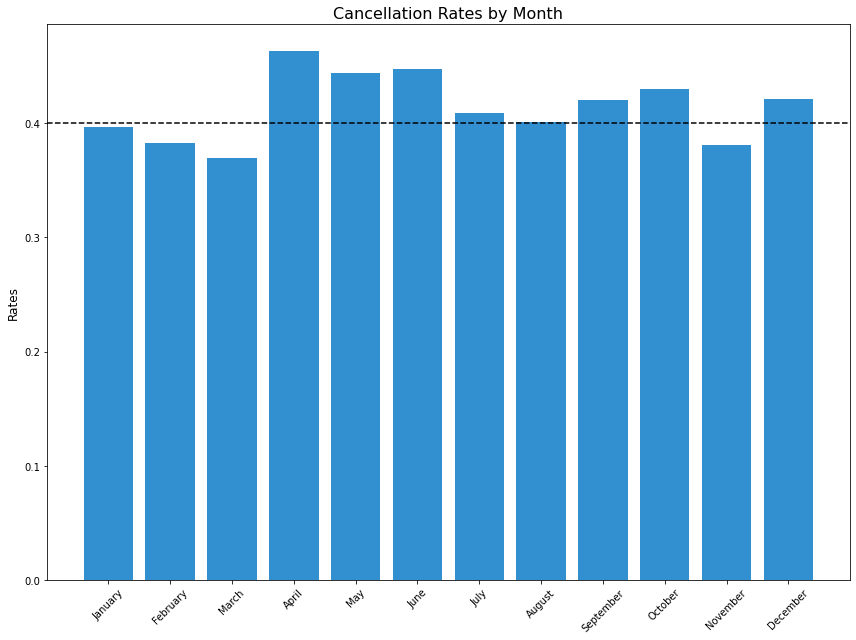

In [143]:
months = hotel_cancel_rates_month.index

fig = plt.figure(figsize = (12,9))
plt.title("Cancellation Rates by Month", fontsize = 16)

plt.bar(months, hotel_cancel_rates_month[months], color='#3290D1')
plt.ylabel("Rates", fontsize = 12)
plt.xticks(rotation=45)
plt.axhline(y=.4, linestyle='--', color='black')

plt.tight_layout()

### Separating city hotels and resort hotel data

In [36]:
city_bookings = hotel_bookings.loc[hotel_bookings.hotel == 'City Hotel']

In [37]:
resort_bookings = hotel_bookings.loc[hotel_bookings.hotel == 'Resort Hotel']

In [38]:
print(f'Resort Hotel cancellation rate: {resort_bookings.is_canceled.sum() / resort_bookings.shape[0]}')
print(f'City Hotel cancellation rate: {city_bookings.is_canceled.sum() / city_bookings.shape[0]}')

Resort Hotel cancellation rate: 0.27763354967548676
City Hotel cancellation rate: 0.41726963317786464


> We can see varying cancellation rates between city and resort hotels. City hotels show a significantly higher rate of cancellations compared to resort hotels. This disparity may need to be investigated separately. We might see different features being the main predictors of cancellations.

### Creating cancel rates per month for resort and city hotels 

In [39]:
city_cancel_rates_month = city_bookings.groupby('arrival_date_month').is_canceled.sum() / \
                          city_bookings.groupby('arrival_date_month').is_canceled.count()

In [40]:
resort_cancel_rates_month = resort_bookings.groupby('arrival_date_month').is_canceled.sum() / \
                            resort_bookings.groupby('arrival_date_month').is_canceled.count()

### Putting months in chronological order rather than alphabetical

In [41]:
months_ordered = ['January', 'February', 'March', 
                  'April', 'May', 'June', 'July', 
                  'August', 'September', 'October', 
                  'November', 'December']

In [42]:
city_cancel_rates_month = city_cancel_rates_month.reindex(months_ordered)

In [43]:
resort_cancel_rates_month = resort_cancel_rates_month.reindex(months_ordered)

In [44]:
city_cancel_rates_month

arrival_date_month
January      0.396681
February     0.382880
March        0.369464
April        0.463235
May          0.443756
June         0.446922
July         0.408754
August       0.400980
September    0.420270
October      0.429717
November     0.381226
December     0.421104
Name: is_canceled, dtype: float64

In [45]:
city_cancel_rates_month.index

Index(['January', 'February', 'March', 'April', 'May', 'June', 'July',
       'August', 'September', 'October', 'November', 'December'],
      dtype='object', name='arrival_date_month')

In [46]:
city_cancel_rates_month['January']

0.3966809421841542

### Plotting side by side comparison of cancellation rates in resort and city hotels

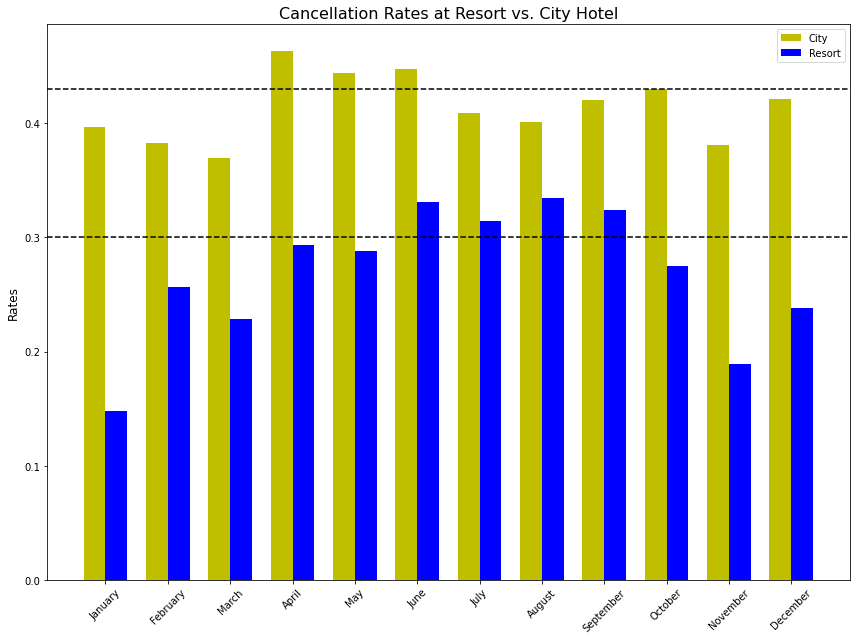

In [141]:
city_months = city_cancel_rates_month.index
resort_months = resort_cancel_rates_month.index

fig = plt.figure(figsize = (12,9))
plt.title("Cancellation Rates at Resort vs. City Hotel", fontsize = 16)
width = .35
plt.bar(city_months, city_cancel_rates_month[city_months], 
        -width, align='edge', color='y', label='City')
plt.bar(resort_months, resort_cancel_rates_month[resort_months], 
        +width, align='edge', color='b', label='Resort')
plt.ylabel("Rates", fontsize = 12)
plt.xticks(rotation=45)
plt.axhline(y=.43, linestyle='--', color='black')
plt.axhline(y=.30, linestyle='--', color='black')

plt.legend(loc = 'upper right')
plt.tight_layout()

> We can see a pretty significant disparity between cancellation rates each month between city hotels and resort hotels.

> We can see the highest rates for the resort hotels occur from April to September.

> The highest cancellation rates for the city hotels occur from April to June, but also include September, October, and December.

# Looking at cancellation rate by groups in different categories

### Create function that divides features into categories and calculates cancellation rate, number of cancellations, number of instances, and percentage of whole of each category

In [48]:
def cancel_rate_grouping(dataset, feature):
    '''returns dataframe with cancellation rates, number of cancellations, 
       and category percentage of whole grouped by category of feature'''
    dataframe = pd.DataFrame(dataset.groupby(feature).is_canceled.sum() / \
                             dataset.groupby(feature).is_canceled.count())
    dataframe.reset_index(inplace=True)
    dataframe.rename(columns={'is_canceled':'cancel_rate'}, inplace=True)
    dataframe['num_cancellations'] = dataset.groupby(feature).is_canceled.sum().values
    dataframe['num_instances'] = dataset.groupby(feature).is_canceled.count().values
    dataframe['feature_perc'] = dataset.groupby(feature).is_canceled.count().values / \
                                dataset.shape[0]
    return dataframe

### Cancellations by market_segment

In [49]:
market_segment_cr = cancel_rate_grouping(hotel_bookings, 'market_segment')

In [50]:
market_segment_cr

,market_segment,cancel_rate,num_cancellations,num_instances,feature_perc
0,Aviation,0.219409,52,237,0.001985
1,Complementary,0.130552,97,743,0.006223
2,Corporate,0.187347,992,5295,0.044350
3,Direct,0.153419,1934,12606,0.105587
4,Groups,0.610620,12097,19811,0.165935
5,Offline TA/TO,0.343160,8311,24219,0.202856
6,Online TA,0.367211,20739,56477,0.473046
7,Undefined,1.000000,2,2,0.000017


> We can see that cancellation rate is highest for undefined, but there are only 2 instances so we can discard that information. The next highest cancellation rate is for Groups which also has a large number of instances and represents over 16% of the market_segment. We can also see that Online TA has a high cancellation rate and the highest number of cancellations due to it representing over 47% of the market_segment.

### Cancellations by distribution_channel

In [51]:
distribution_channel_cr = cancel_rate_grouping(hotel_bookings, 'distribution_channel')

In [52]:
distribution_channel_cr

,distribution_channel,cancel_rate,num_cancellations,num_instances,feature_perc
0,Corporate,0.220758,1474,6677,0.055926
1,Direct,0.174599,2557,14645,0.122665
2,GDS,0.191710,37,193,0.001617
3,TA/TO,0.410259,40152,97870,0.819750
4,Undefined,0.800000,4,5,0.000042


### Cancellations by total_of_special_requests

In [53]:
special_requests_cr = cancel_rate_grouping(hotel_bookings, 'total_of_special_requests')

In [54]:
special_requests_cr

,total_of_special_requests,cancel_rate,num_cancellations,num_instances,feature_perc
0,0,0.477204,33556,70318,0.588977
1,1,0.220249,7318,33226,0.278298
2,2,0.220989,2866,12969,0.108627
3,3,0.178614,446,2497,0.020915
4,4,0.105882,36,340,0.002848
5,5,0.050000,2,40,0.000335


> We can see a strong negative correlation between number of special requests and number of cancellations.

### Cancellations by is_repeated_guest

In [55]:
is_repeated_guest_cr = cancel_rate_grouping(hotel_bookings, 'is_repeated_guest')

In [56]:
is_repeated_guest_cr

,is_repeated_guest,cancel_rate,num_cancellations,num_instances,feature_perc
0,0,0.377851,43672,115580,0.968088
1,1,0.144882,552,3810,0.031912


> Here we can note that the cancel_rate is much higher (over double) for new guests as opposed to repeated guests.

### Cancellations by booking_changes

In [57]:
booking_changes_cr = cancel_rate_grouping(hotel_bookings, 'booking_changes')

In [58]:
booking_changes_cr

,booking_changes,cancel_rate,num_cancellations,num_instances,feature_perc
0,0,0.408542,41391,101314,0.848597
1,1,0.142272,1807,12701,0.106382
2,2,0.201314,766,3805,0.031870
3,3,0.155340,144,927,0.007764
4,4,0.178191,67,376,0.003149
5,5,0.169492,20,118,0.000988
6,6,0.285714,18,63,0.000528
7,7,0.096774,3,31,0.000260
8,8,0.235294,4,17,0.000142
9,9,0.125000,1,8,0.000067


> We can see a fairly strong negative correlation between booking_changes and cancel_rate. I believe that this is indicative of the person who made the booking updating the booking in anticipation for actually showing up rather than canceling. This may be useful information when trying to predict whether or not booking will be canceled. 

### Cancellations by deposit_type

In [59]:
deposit_type_cr = cancel_rate_grouping(hotel_bookings, 'deposit_type')

In [60]:
deposit_type_cr

,deposit_type,cancel_rate,num_cancellations,num_instances,feature_perc
0,No Deposit,0.283770,29694,104641,0.876464
1,Non Refund,0.993624,14494,14587,0.122179
2,Refundable,0.222222,36,162,0.001357


> It's interesting to note that the lowest rate of cancellations came from refundable type bookings. No deposit bookings represent the largest category in deposit_type. There are still a large number of non refundable booking cancellations which I did not expect. The rate of cancellation for non refundable deposit_type was over 99%. This indicates that non-refundable deposits are not the best deterrent when it comes to cancellations.

### Cancellations by customer_type

In [61]:
customer_type_cr = cancel_rate_grouping(hotel_bookings, 'customer_type')

In [62]:
customer_type_cr

,customer_type,cancel_rate,num_cancellations,num_instances,feature_perc
0,Contract,0.309617,1262,4076,0.034140
1,Group,0.102253,59,577,0.004833
2,Transient,0.407463,36514,89613,0.750591
3,Transient-Party,0.254299,6389,25124,0.210436


### Cancellations by lead_time

In [63]:
lead_time_cr = cancel_rate_grouping(hotel_bookings, 'lead_time')

In [64]:
lead_time_cr

,lead_time,cancel_rate,num_cancellations,num_instances,feature_perc
0,0,0.067770,430,6345,0.053145
1,1,0.092775,321,3460,0.028981
2,2,0.102948,213,2069,0.017330
3,3,0.100220,182,1816,0.015211
4,4,0.102624,176,1715,0.014365
...,...,...,...,...,...
474,622,1.000000,17,17,0.000142
475,626,1.000000,30,30,0.000251
476,629,1.000000,17,17,0.000142
477,709,0.000000,0,1,0.000008


> This information would be much better suited in graphical form

### Plotting cancellations rates by lead time

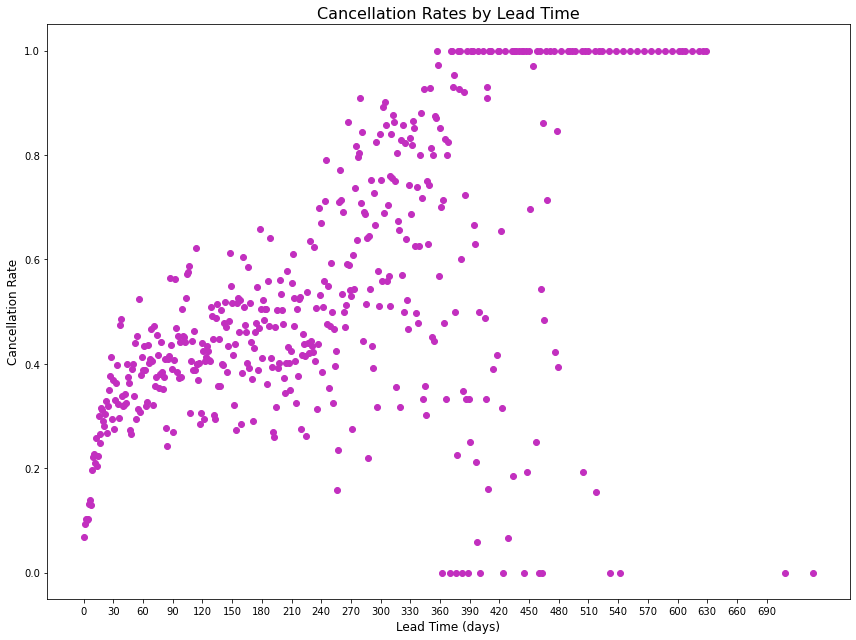

In [154]:
fig = plt.figure(figsize = (12,9))
plt.title("Cancellation Rates by Lead Time", fontsize = 16)
plt.scatter(lead_time_cr['lead_time'], lead_time_cr['cancel_rate'], color='#C22FBF')

plt.ylabel("Cancellation Rate", fontsize = 12)
plt.xlabel("Lead Time (days)", fontsize = 12)
plt.xticks(np.arange(0, 720, 30))

plt.tight_layout()

> We start to see a clear pattern in the bookings made in the 30 days before arrival date. There is a very strong positive correlation between cancellation rate and lead time. This pattern begins to unravel a bit after 30 days and a correlation is harder to make. This may be due to looking at individual days so I want to group the booking lead times into weeks rather that individual days to get a clearer picture.

### Looking at lead time in number of weeks rather than days

In [66]:
lead_time_cr['lead_time_week'] = lead_time_cr.lead_time // 7

In [67]:
lead_time_cr

,lead_time,cancel_rate,num_cancellations,num_instances,feature_perc,lead_time_week
0,0,0.067770,430,6345,0.053145,0
1,1,0.092775,321,3460,0.028981,0
2,2,0.102948,213,2069,0.017330,0
3,3,0.100220,182,1816,0.015211,0
4,4,0.102624,176,1715,0.014365,0
...,...,...,...,...,...,...
474,622,1.000000,17,17,0.000142,88
475,626,1.000000,30,30,0.000251,89
476,629,1.000000,17,17,0.000142,89
477,709,0.000000,0,1,0.000008,101


### Calculating cancel_rate by lead time in weeks

In [68]:
lead_time_week_cr = pd.DataFrame(lead_time_cr.groupby('lead_time_week').num_cancellations.sum() / \
                                 lead_time_cr.groupby('lead_time_week').num_instances.sum())


In [69]:
lead_time_week_cr

,0
lead_time_week,
0,0.093945
1,0.203328
2,0.277226
3,0.318260
4,0.351995
...,...
87,1.000000
88,1.000000
89,1.000000


In [70]:
lead_time_week_cr.reset_index(inplace=True)
lead_time_week_cr.rename(columns={0:'cancel_rate'}, inplace=True)

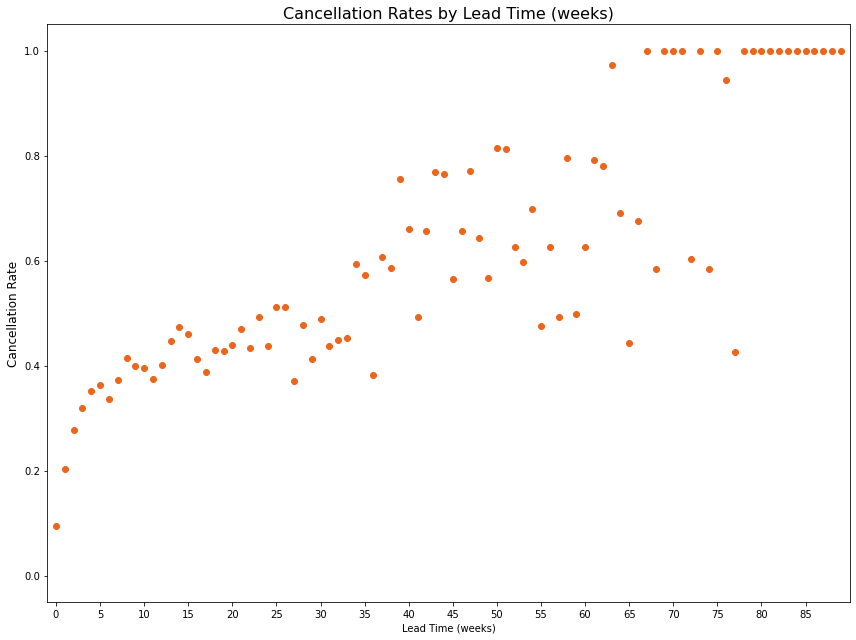

In [71]:
fig = plt.figure(figsize = (12,9))
plt.title("Cancellation Rates by Lead Time (weeks)", fontsize = 16)
plt.scatter(lead_time_week_cr['lead_time_week'], lead_time_week_cr['cancel_rate'], color='#EB661B')

plt.ylabel("Cancellation Rate", fontsize = 12)
plt.xlabel("Lead Time (weeks)")
plt.xlim(-1,90)
plt.xticks(np.arange(0,90,5))

plt.tight_layout()

> Looking at lead time in number of weeks rather than days does give a clearer picture. We can clearly see a sharp rise in cancellation rate as the lead time increases. The increase in cancellation rate starts to level off a bit after about 4 weeks (1 month), but stays relatively high and even continues to rise albeit at a slower pace. 

### Create a function that takes lead time cancellation rate data and forms scatterplot

> This will save time in the event I divide the data into subsets (specifically city hotel and resort hotel)

In [72]:
def lead_time_week_cr_plot(dataframe):
    '''takes in lead time cancellation rates and puts them in weekly bins and 
       calculates cancellation rate for each bin. The output will then be a 
       scatterplot of cancellation rates for each week lead time
       input: dataframe
       output: scatterplot of cancellation rates by lead time in number of weeks'''
    lead_time_cr = cancel_rate_grouping(dataframe, feature='lead_time')
    # create column with lead time in weeks rather than days
    lead_time_cr['lead_time_week'] = lead_time_cr.lead_time // 7
    # sum up number of cancellations in week and divide by number of bookings 
    # in week for cancellation rate
    # create dataframe of cancellation rate per lead time in weeks
    lead_time_week_cr = pd.DataFrame(lead_time_cr.groupby('lead_time_week').num_cancellations.sum() / \
                                 lead_time_cr.groupby('lead_time_week').num_instances.sum())
    lead_time_week_cr.reset_index(inplace=True)
    lead_time_week_cr.rename(columns={0:'cancel_rate'}, inplace=True)
    
    # plot data
    fig = plt.figure(figsize = (12,9))
    plt.title("Cancellation Rates by Lead Time (weeks)", fontsize = 16)
    plt.scatter(lead_time_week_cr['lead_time_week'], lead_time_week_cr['cancel_rate'], color='#EB661B')

    plt.ylabel("Cancellation Rate", fontsize = 12)
    plt.xlabel("Lead Time (weeks)")
    plt.xlim(-1,90)
    plt.xticks(np.arange(0,90,5))

    plt.tight_layout()

# Cleaning the dataset

    1. replace null in children with 0
    2. change agent and company to binary classification (1 represents yes; 0 represents no) 
    3. drop country
        -majority of country are PRT because hotels are located in Portugal
    4. drop reservation_status and reservation_status_date
        - these are further explorations of the cancelations; not necessary for our learning model
    5. drop name, email, phone-number, credit_card
        - not singling out individuals, we want general population patterns
    6. drop arrival_date_year, arrival_date_month_conv
    

### Make copy of data to clean

In [73]:
hb_clean = hotel_bookings.copy()

## 1. Replace null in children with 0

In [81]:
hb_clean.children.fillna(0, inplace=True)

## 2. Change agent and company to binary classification (1 represents yes; 0 represents no) 

### Replace all ID numbers in agent and company feature with 1

In [82]:
# determine smallest ID value for company feature
hb_clean.company.min()

6.0

In [83]:
# replaces all values greater than 0 with 1
hb_clean.company.mask(hotel_bookings.company > 0, 1, inplace=True)

In [84]:
# determine smallest ID value for agent feature
hb_clean.agent.min()

1.0

In [85]:
hb_clean.agent.mask(hotel_bookings.agent > 0, 1, inplace=True)

### Replace all NaN with 0 for agent and company feature

In [86]:
hb_clean.agent.fillna(0, inplace=True)
hb_clean.company.fillna(0, inplace=True)

## 3., 4., 5., and 6. Drop unnecessary features

### Dropping all features unnecessary for my analysis 

In [79]:
hb_clean.drop(['arrival_date_year', 'arrival_date_day_of_month',
               'arrival_date_week_number', 'country',
               'reservation_status', 'reservation_status_date',
               'name', 'email', 'phone-number', 'credit_card',
               'arrival_date', 'arrival_date_month_conv'], axis=1, inplace = True)
                                           

In [87]:
hb_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 27 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_month              119390 non-null  object 
 4   stays_in_weekend_nights         119390 non-null  int64  
 5   stays_in_week_nights            119390 non-null  int64  
 6   adults                          119390 non-null  int64  
 7   children                        119390 non-null  float64
 8   babies                          119390 non-null  int64  
 9   meal                            119390 non-null  object 
 10  market_segment                  119390 non-null  object 
 11  distribution_channel            119390 non-null  object 
 12  is_repeated_gues

> All columns have 119,390 non-null values and all unnecessary columns have been dropped. The resulting dataframe now has 26 unique features in addition to our outcome variable. This dataset is now clean and ready to begin processing for our learning models.

# Features processing and learning models:
    1. normalize numerical features
    2. one-hot encoding of categorical variables
    3. split into training and test sets
    4. create naive predictor (baseline)
    5. set up training and predicting pipeline
    

# 1. Normalize numerical features

In [88]:
# separate outcome from features
outcome = hb_clean['is_canceled']
features_raw = hb_clean.drop('is_canceled', axis=1)

In [89]:
# Import scaler
from sklearn.preprocessing import MinMaxScaler

# Initialize a scaler, then apply it to the features
scaler = MinMaxScaler() # default=(0, 1)
numerical = ['lead_time', 'stays_in_weekend_nights', 'stays_in_week_nights', 
             'adults', 'children', 'babies', 'previous_cancellations', 
             'previous_bookings_not_canceled', 'booking_changes', 'days_in_waiting_list', 
             'adr', 'required_car_parking_spaces', 'total_of_special_requests']

features_scaled = pd.DataFrame(data = features_raw)
features_scaled[numerical] = scaler.fit_transform(features_raw[numerical])

features_scaled.head(5)

,hotel,lead_time,arrival_date_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,market_segment,...,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,stay_length
0,Resort Hotel,0.464043,July,0.0,0.00,0.036364,0.0,0.0,BB,Direct,...,0.142857,No Deposit,0.0,0.0,0.0,Transient,0.001180,0.0,0.0,0
1,Resort Hotel,1.000000,July,0.0,0.00,0.036364,0.0,0.0,BB,Direct,...,0.190476,No Deposit,0.0,0.0,0.0,Transient,0.001180,0.0,0.0,0
2,Resort Hotel,0.009498,July,0.0,0.02,0.018182,0.0,0.0,BB,Direct,...,0.000000,No Deposit,0.0,0.0,0.0,Transient,0.015053,0.0,0.0,1
3,Resort Hotel,0.017639,July,0.0,0.02,0.018182,0.0,0.0,BB,Corporate,...,0.000000,No Deposit,1.0,0.0,0.0,Transient,0.015053,0.0,0.0,1
4,Resort Hotel,0.018996,July,0.0,0.04,0.036364,0.0,0.0,BB,Online TA,...,0.000000,No Deposit,1.0,0.0,0.0,Transient,0.019307,0.0,0.2,2


# 2. One-hot encoding of categorical variables

In [90]:
# One-hot encode the 'features_scaled' data using pandas.get_dummies()
features_final = pd.get_dummies(features_scaled)

# Print the number of features after one-hot encoding
encoded = list(features_final.columns)
print("{} total features after one-hot encoding.".format(len(encoded)))

78 total features after one-hot encoding.


# 3. Split into training and test sets

In [91]:
# Import train_test_split
from sklearn.model_selection import train_test_split

# Split the 'features' and 'income' data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features_final, 
                                                    outcome, 
                                                    test_size = 0.2, 
                                                    random_state = 0)

# Show the results of the split
print("Training set has {} samples.".format(X_train.shape[0]))
print("Testing set has {} samples.".format(X_test.shape[0]))

Training set has 95512 samples.
Testing set has 23878 samples.


# 4. Create naive predictor (baseline)

In [92]:
'''
TP = np.sum(income) # Counting the ones as this is the naive case. Note that 'income' is the 'income_raw' data 
encoded to numerical values done in the data preprocessing step.
FP = income.count() - TP # Specific to the naive case

TN = 0 # No predicted negatives in the naive case
FN = 0 # No predicted negatives in the naive case
'''
TP = np.sum(outcome)
FP = outcome.count() - TP
TN = 0
FN = 0

# TODO: Calculate accuracy, precision and recall
accuracy = (TP + TN)/(TP + TN + FP + FN) # np.sum(income)/income.shape[0]
recall = TP / (TP + FN) # np.sum(income)/np.sum(income)
precision = TP / (TP + FP) # np.sum(income)/income.shape[0]

# TODO: Calculate F-score using the formula above for beta = 0.5 and correct values for precision and recall.
beta = 0.5
fscore = (1+beta**2)*((precision*recall)/((beta**2)*precision + recall))

# Print the results 
print("Naive Predictor: [Accuracy score: {:.4f}, F-score: {:.4f}]".format(accuracy, fscore))

Naive Predictor: [Accuracy score: 0.3704, F-score: 0.4238]


### Confirming accuracy is represented as the percentage of canceled outcomes

In [156]:
hotel_bookings.is_canceled.sum()/hotel_bookings.shape[0]

0.37041628277075134

In [93]:
# Import two metrics from sklearn - fbeta_score and accuracy_score
from sklearn.metrics import fbeta_score
from sklearn.metrics import accuracy_score

def train_predict(learner, sample_size, X_train, y_train, X_test, y_test): 
    '''
    inputs:
       - learner: the learning algorithm to be trained and predicted on
       - sample_size: the size of samples (number) to be drawn from training set
       - X_train: features training set
       - y_train: income training set
       - X_test: features testing set
       - y_test: income testing set
    '''
    
    results = {}
    
    # Fit the learner to the training data using slicing with 'sample_size' using .fit(training_features[:], training_labels[:])
    start = time() # Get start time
    learner = learner.fit(X_train[:sample_size], y_train[:sample_size])
    end = time() # Get end time
    
    # Calculate the training time
    results['train_time'] = end - start
        
    # Get the predictions on the test set(X_test),
    #       then get predictions on the first 300 training samples(X_train) using .predict()
    start = time() # Get start time
    predictions_test = learner.predict(X_test)
    predictions_train = learner.predict(X_train[:300])
    end = time() # Get end time
    
    # Calculate the total prediction time
    results['pred_time'] = end - start
            
    # Compute accuracy on the first 300 training samples which is y_train[:300]
    results['acc_train'] = accuracy_score(y_train[:300], predictions_train)
        
    # Compute accuracy on test set using accuracy_score()
    results['acc_test'] = accuracy_score(y_test, predictions_test)
    
    # Compute F-score on the the first 300 training samples using fbeta_score()
    results['f_train'] = fbeta_score(y_train[:300], predictions_train, beta=1)
        
    # Compute F-score on the test set which is y_test
    results['f_test'] = fbeta_score(y_test, predictions_test, beta=0.5)
       
    # Success
    print("{} trained on {} samples.".format(learner.__class__.__name__, sample_size))
        
    # Return the results
    return results

GradientBoostingClassifier trained on 955 samples.
GradientBoostingClassifier trained on 9551 samples.
GradientBoostingClassifier trained on 95512 samples.
RandomForestClassifier trained on 955 samples.
RandomForestClassifier trained on 9551 samples.
RandomForestClassifier trained on 95512 samples.
AdaBoostClassifier trained on 955 samples.
AdaBoostClassifier trained on 9551 samples.
AdaBoostClassifier trained on 95512 samples.


/Users/aaronbuck/Desktop/Capstone_Project_Files/helper_functions.py:94: UserWarning: Tight layout not applied. tight_layout cannot make axes width small enough to accommodate all axes decorations
  pl.tight_layout()


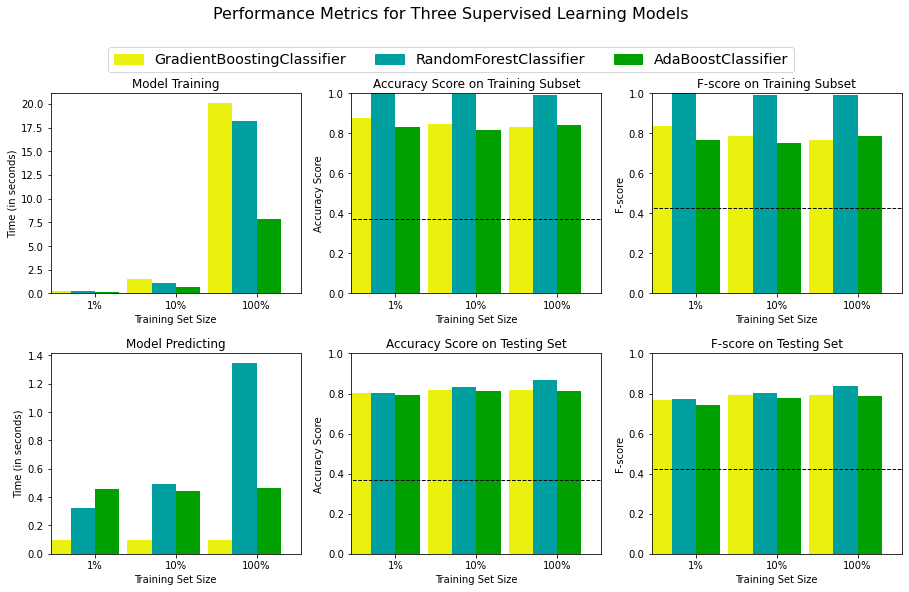

In [94]:
# Initialize the three models
clf_A = GradientBoostingClassifier()
clf_B = RandomForestClassifier()
clf_C = AdaBoostClassifier()

# Calculate the number of samples for 1%, 10%, and 100% of the training data
samples_100 = len(y_train)
samples_10 = int(0.1*samples_100)
samples_1 = int(0.01*samples_100)

# Collect results on the learners
results = {}
for clf in [clf_A, clf_B, clf_C]:
    clf_name = clf.__class__.__name__
    results[clf_name] = {}
    for i, samples in enumerate([samples_1, samples_10, samples_100]):
        results[clf_name][i] = \
        train_predict(clf, samples, X_train, y_train, X_test, y_test)

# Run metrics visualization for the three supervised learning models chosen
vs.evaluate(results, accuracy, fscore)

# Optimization of the best fit model (Random Forest)

In [101]:
# TODO: Import 'GridSearchCV', 'make_scorer', and any other necessary libraries
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer

# TODO: Initialize the classifier
clf = RandomForestClassifier()

# TODO: Create the parameters list you wish to tune, using a dictionary if needed.
# HINT: parameters = {'parameter_1': [value1, value2], 'parameter_2': [value1, value2]}
parameters = {'max_depth': [None,1,3,5,7,9]}
#               'max_features': range(1,11),  
#               'min_samples_split': range(2, 5),
#               'min_samples_leaf': [1,3,5]}

# TODO: Make an fbeta_score scoring object using make_scorer()
scorer = make_scorer(fbeta_score, beta=0.5)

# TODO: Perform grid search on the classifier using 'scorer' as the scoring method using GridSearchCV()
grid_obj = GridSearchCV(clf, scoring=scorer, param_grid=parameters)

# TODO: Fit the grid search object to the training data and find the optimal parameters using fit()
grid_fit = grid_obj.fit(X_train, y_train)

# Get the estimator
best_clf = grid_fit.best_estimator_

# Make predictions using the unoptimized and model
predictions = (clf.fit(X_train, y_train)).predict(X_test)
best_predictions = best_clf.predict(X_test)

# Report the before-and-afterscores
print("Unoptimized model\n------")
print("Accuracy score on testing data: {:.4f}".format(accuracy_score(y_test, predictions)))
print("F-score on testing data: {:.4f}".format(fbeta_score(y_test, predictions, beta = 0.5)))
print("\nOptimized Model\n------")
print("Final accuracy score on the testing data: {:.4f}".format(accuracy_score(y_test, best_predictions)))
print("Final F-score on the testing data: {:.4f}".format(fbeta_score(y_test, best_predictions, beta = 0.5)))

Unoptimized model
------
Accuracy score on testing data: 0.8663
F-score on testing data: 0.8403

Optimized Model
------
Final accuracy score on the testing data: 0.8665
Final F-score on the testing data: 0.8416


> The time needed for this optimization process to take place along with the very insignificant improvements made rendered the process useless. The best fit model will be the original model produced.

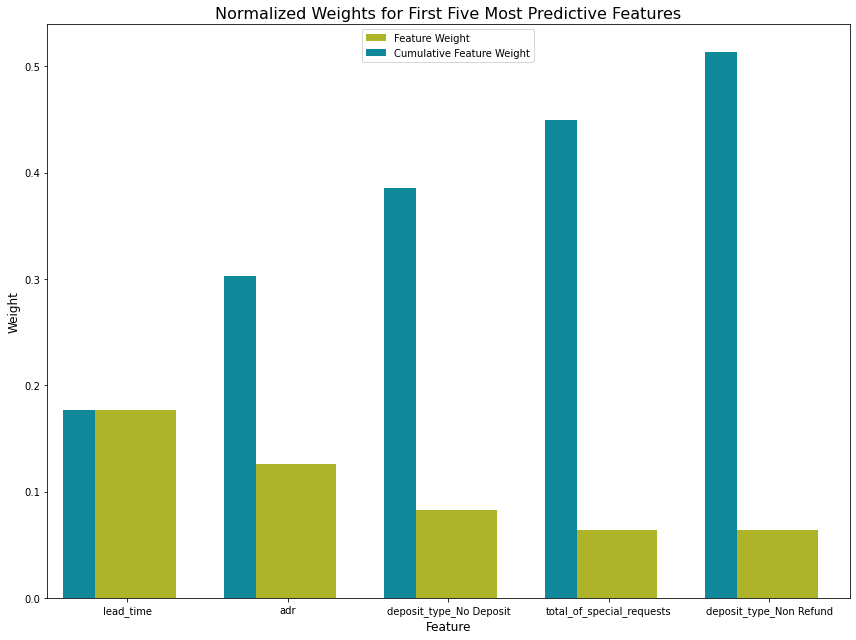

In [157]:
# Import a supervised learning model that has 'feature_importances_'
# Reusing already imported model
clf = RandomForestClassifier()

# Train the supervised model on the training set using .fit(X_train, y_train)
model = clf.fit(X_train, y_train)

# Extract the feature importances using .feature_importances_ 
importances = model.feature_importances_

# Plot
vs.feature_plot(importances, X_train, y_train);

> We can see the five leading predictors of cancellations in our best fit model are: 
>    1. lead time 
>    2. ADR 
>    3. deposit type (No deposit) 
>    4. total of special requests 
>    5. deposit type (Non Refund)
> 
> Further analysis will focus on the lead time feature

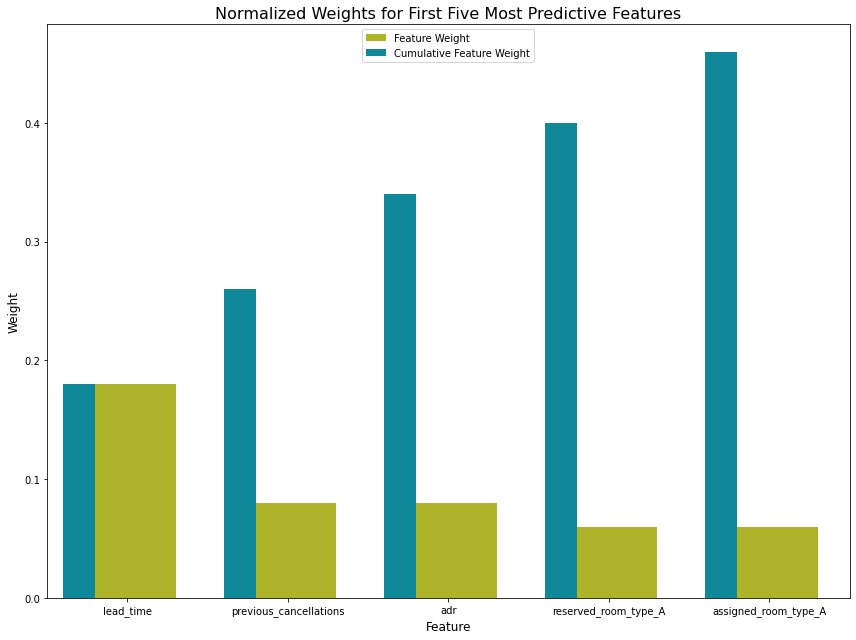

In [158]:
# TODO: Import a supervised learning model that has 'feature_importances_'
# Reusing already imported model
clf = AdaBoostClassifier()

# TODO: Train the supervised model on the training set using .fit(X_train, y_train)
model = clf.fit(X_train, y_train)

# TODO: Extract the feature importances using .feature_importances_ 
importances = model.feature_importances_

# Plot
vs.feature_plot(importances, X_train, y_train);

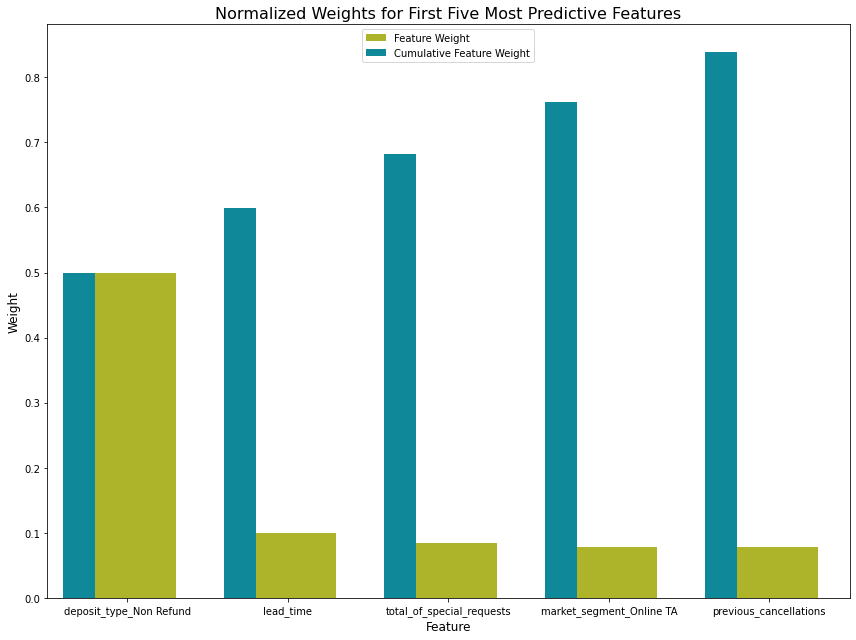

In [159]:
vs.top_five_features(GradientBoostingClassifier(), X_train, y_train)

# Creating subsets of data (city and resort) and cleaning

In [160]:
city_bookings_clean = hb_clean.loc[hb_clean.hotel == 'City Hotel']

In [161]:
resort_bookings_clean = hb_clean.loc[hb_clean.hotel == 'Resort Hotel']

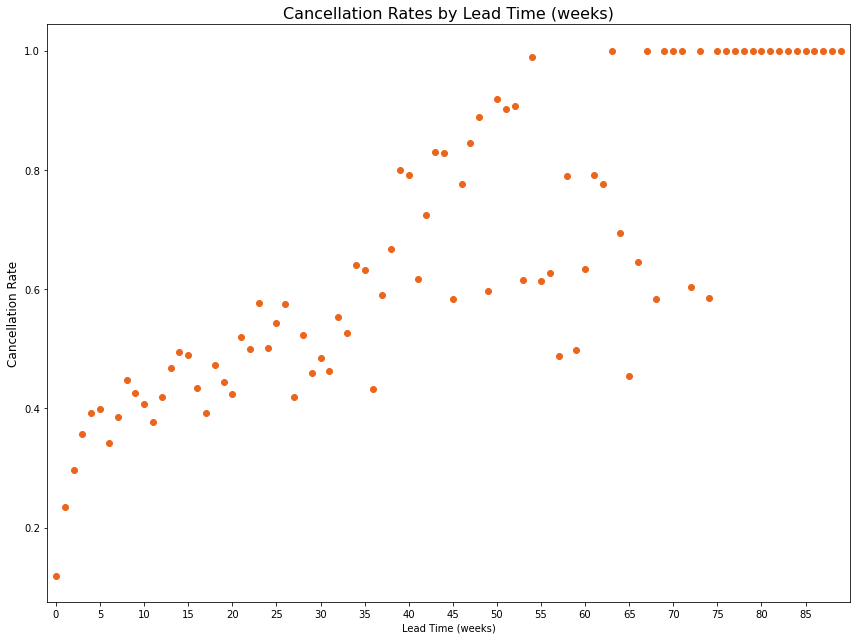

In [162]:
lead_time_week_cr_plot(city_bookings)

> Cancellation rate for city hotels continues to increases with lead time

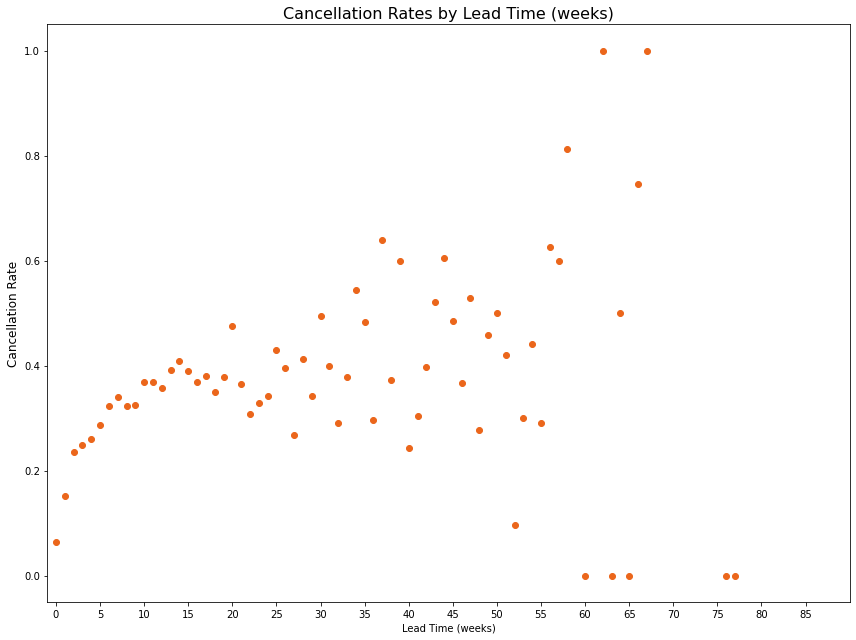

In [163]:
lead_time_week_cr_plot(resort_bookings)

> Cancellation rates for resort hotels tend to level off with increasing lead time. This suggests people tend to have a stronger commitment when booking resorts over city hotels.

# Feature processing and learning model application for city hotel data

In [164]:
features_final, outcome = vs.feature_processing(city_bookings_clean)

71 total features after one-hot encoding.
['lead_time', 'stays_in_weekend_nights', 'stays_in_week_nights', 'adults', 'children', 'babies', 'is_repeated_guest', 'previous_cancellations', 'previous_bookings_not_canceled', 'booking_changes', 'agent', 'company', 'days_in_waiting_list', 'adr', 'required_car_parking_spaces', 'total_of_special_requests', 'stay_length', 'hotel_City Hotel', 'arrival_date_month_April', 'arrival_date_month_August', 'arrival_date_month_December', 'arrival_date_month_February', 'arrival_date_month_January', 'arrival_date_month_July', 'arrival_date_month_June', 'arrival_date_month_March', 'arrival_date_month_May', 'arrival_date_month_November', 'arrival_date_month_October', 'arrival_date_month_September', 'meal_BB', 'meal_FB', 'meal_HB', 'meal_SC', 'market_segment_Aviation', 'market_segment_Complementary', 'market_segment_Corporate', 'market_segment_Direct', 'market_segment_Groups', 'market_segment_Offline TA/TO', 'market_segment_Online TA', 'market_segment_Undefine

In [165]:
X_train, X_test, y_train, y_test, accuracy, fscore = vs.train_test_baseline(features_final, outcome);

Training set has 63464 samples.
Testing set has 15866 samples.
Naive Predictor: [Accuracy score: 0.4173, F-score: 0.4723]


GradientBoostingClassifier trained on 634 samples.
GradientBoostingClassifier trained on 6346 samples.
GradientBoostingClassifier trained on 63464 samples.
RandomForestClassifier trained on 634 samples.
RandomForestClassifier trained on 6346 samples.
RandomForestClassifier trained on 63464 samples.
AdaBoostClassifier trained on 634 samples.
AdaBoostClassifier trained on 6346 samples.
AdaBoostClassifier trained on 63464 samples.


/Users/aaronbuck/Desktop/Capstone_Project_Files/helper_functions.py:94: UserWarning: Tight layout not applied. tight_layout cannot make axes width small enough to accommodate all axes decorations
  pl.tight_layout()


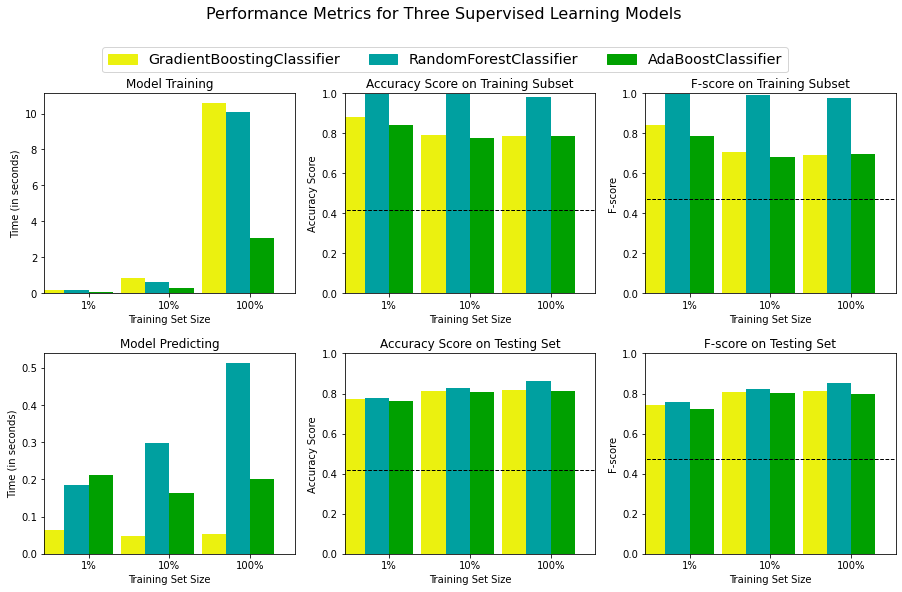

In [166]:
classifiers = [GradientBoostingClassifier(), RandomForestClassifier(), AdaBoostClassifier()]

vs.learning_model_comparison(classifiers, X_train, X_test, y_train, y_test, accuracy, fscore);

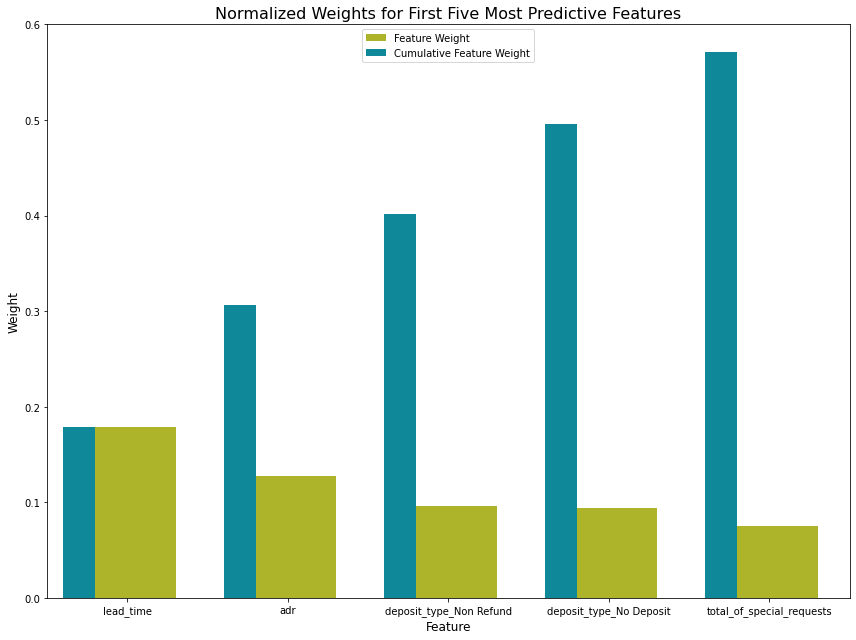

In [167]:
vs.top_five_features(RandomForestClassifier(), X_train, y_train)

# Feature processing and learning model application for resort hotel data

In [168]:
features_final, outcome = vs.feature_processing(resort_bookings_clean)

73 total features after one-hot encoding.
['lead_time', 'stays_in_weekend_nights', 'stays_in_week_nights', 'adults', 'children', 'babies', 'is_repeated_guest', 'previous_cancellations', 'previous_bookings_not_canceled', 'booking_changes', 'agent', 'company', 'days_in_waiting_list', 'adr', 'required_car_parking_spaces', 'total_of_special_requests', 'stay_length', 'hotel_Resort Hotel', 'arrival_date_month_April', 'arrival_date_month_August', 'arrival_date_month_December', 'arrival_date_month_February', 'arrival_date_month_January', 'arrival_date_month_July', 'arrival_date_month_June', 'arrival_date_month_March', 'arrival_date_month_May', 'arrival_date_month_November', 'arrival_date_month_October', 'arrival_date_month_September', 'meal_BB', 'meal_FB', 'meal_HB', 'meal_SC', 'meal_Undefined', 'market_segment_Complementary', 'market_segment_Corporate', 'market_segment_Direct', 'market_segment_Groups', 'market_segment_Offline TA/TO', 'market_segment_Online TA', 'distribution_channel_Corporate

In [169]:
X_train, X_test, y_train, y_test, accuracy, fscore = vs.train_test_baseline(features_final, outcome);

Training set has 32048 samples.
Testing set has 8012 samples.
Naive Predictor: [Accuracy score: 0.2776, F-score: 0.3245]


GradientBoostingClassifier trained on 320 samples.
GradientBoostingClassifier trained on 3204 samples.
GradientBoostingClassifier trained on 32048 samples.
RandomForestClassifier trained on 320 samples.
RandomForestClassifier trained on 3204 samples.
RandomForestClassifier trained on 32048 samples.
AdaBoostClassifier trained on 320 samples.
AdaBoostClassifier trained on 3204 samples.
AdaBoostClassifier trained on 32048 samples.


/Users/aaronbuck/Desktop/Capstone_Project_Files/helper_functions.py:94: UserWarning: Tight layout not applied. tight_layout cannot make axes width small enough to accommodate all axes decorations
  pl.tight_layout()


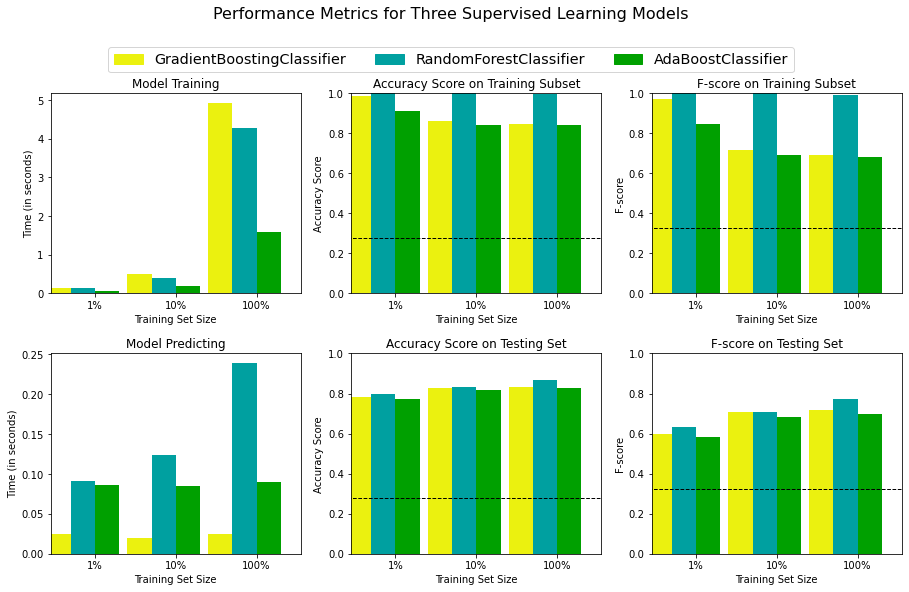

In [170]:
classifiers = [GradientBoostingClassifier(), RandomForestClassifier(), AdaBoostClassifier()]

vs.learning_model_comparison(classifiers, X_train, X_test, y_train, y_test, accuracy, fscore);

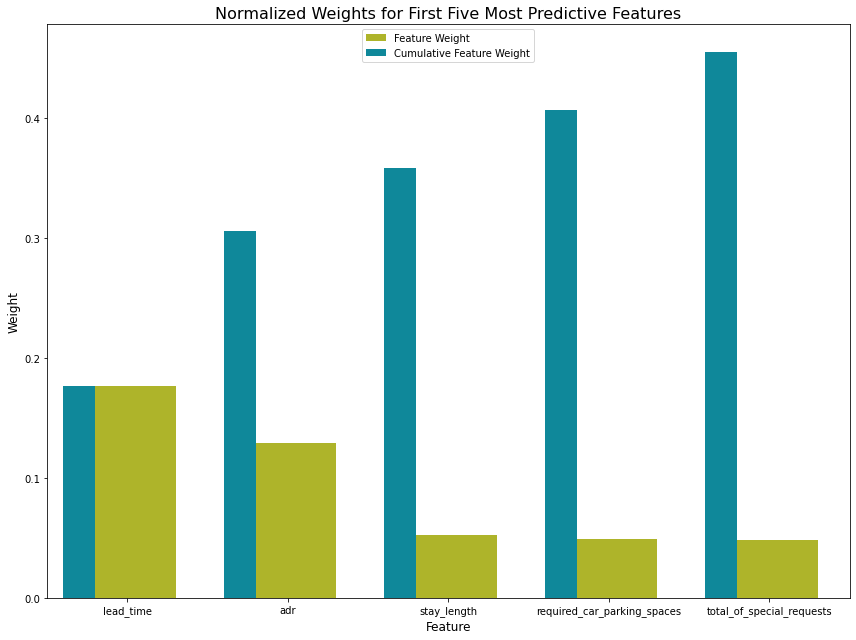

In [171]:
vs.top_five_features(RandomForestClassifier(), X_train, y_train)

### Calculating rebook_time (time from cancellation to arrival_date)

In [172]:
# want to create a copy of data rather than a view using .copy() 
# see: https://stackoverflow.com/questions/45615922/settingwithcopywarning-using-pandas-apply
hotel_cancellations = hotel_bookings.loc[hotel_bookings.is_canceled == 1].copy()

In [173]:
# convert dates in reservation_status_date from str to datetime
hotel_cancellations.loc[:,'reservation_status_date'] = hotel_cancellations.reservation_status_date.apply(lambda x: pd.to_datetime(x))

In [174]:
# create new column rebook_time which is difference between cancellation date (reservation_status_date) and arrival_date
# for more info https://www.geeksforgeeks.org/pandas-number-of-months-between-two-dates/
hotel_cancellations = hotel_cancellations.assign(rebook_time=lambda x: \
                                                 ((x['arrival_date'] - x['reservation_status_date']) / \
                                                 np.timedelta64(1, 'D')))

In [175]:
hotel_cancellations.rebook_time = hotel_cancellations.rebook_time.astype(int)

In [176]:
hotel_cancellations[['reservation_status', 'reservation_status_date', 
                     'is_canceled', 'arrival_date', 'rebook_time', 'lead_time']].sample(10)

,reservation_status,reservation_status_date,is_canceled,arrival_date,rebook_time,lead_time
43088,Canceled,2015-08-22,1,2015-09-14,23,38
58563,Canceled,2016-09-06,1,2016-10-13,37,37
12924,Canceled,2017-05-10,1,2017-07-23,74,84
81907,Canceled,2015-12-18,1,2016-05-05,139,181
13758,Canceled,2017-07-01,1,2017-08-28,58,59
61803,Canceled,2016-10-02,1,2016-12-26,85,257
73911,Canceled,2015-01-01,1,2015-07-02,182,258
43406,Canceled,2015-07-06,1,2015-09-18,74,74
47991,Canceled,2016-01-11,1,2016-03-11,60,62
12775,Canceled,2017-03-20,1,2017-07-16,118,180


In [177]:
# capturing number of cancellations between day numbers
values = []
days = [0, 30, 45, 60, 90, 120, 150, 1000]
x = 0
while x < (len(days) - 1):
    print(f'Number of cancellations between {days[x]} and {days[x+1]}:', 
          (hotel_cancellations.loc[(hotel_cancellations.rebook_time >= days[x]) &
                                  (hotel_cancellations.rebook_time < days[x+1])].shape[0]))
    values.append(hotel_cancellations.loc[(hotel_cancellations.rebook_time >= days[x]) & 
                                          (hotel_cancellations.rebook_time < days[x+1])].shape[0])
    x = x + 1

Number of cancellations between 0 and 30: 15470
Number of cancellations between 30 and 45: 4609
Number of cancellations between 45 and 60: 3463
Number of cancellations between 60 and 90: 5033
Number of cancellations between 90 and 120: 3708
Number of cancellations between 120 and 150: 2971
Number of cancellations between 150 and 1000: 8970


> This indicates a large portion of cancellations (over 1/3) occur within 30 days of the arrival date. Over half of the cancellations took place between 0 and 60 days prior to arrival date. This leaves very little time to rebook. 

In [ ]:
hotel_cancellations.loc[(hotel_cancellations.rebook_time > 30) & (hotel_cancellations.rebook_time <= 45)].shape[0]

In [ ]:
hotel_cancellations.shape

In [ ]:
hotel_cancellations[['arrival_date', 'rebook_time', 'lead_time']].query('rebook_time <= 30' and 'lead_time <= 30')

In [ ]:
hotel_cancellations[['arrival_date', 'rebook_time', 'lead_time']].query('lead_time <= 60')

In [178]:
# convert number of cancellations to percentage of total cancellations
values_perc = [x / hotel_cancellations.shape[0] for x in values]

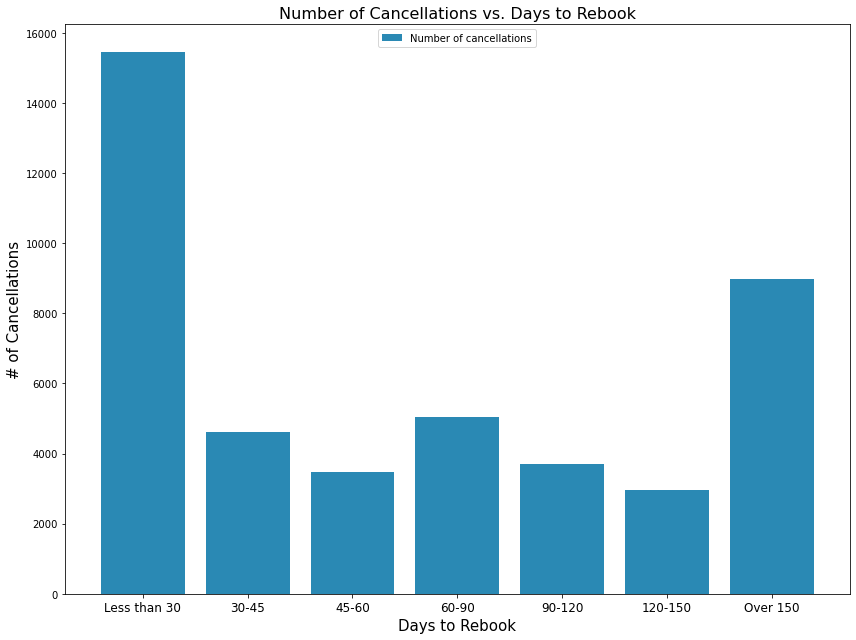

In [179]:
fig = plt.figure(figsize = (12,9))
plt.title("Number of Cancellations vs. Days to Rebook", fontsize = 16)
plt.bar(np.arange(7), values, color='#2A89B4', label="Number of cancellations")

plt.xticks(np.arange(7), ['Less than 30', '30-45', '45-60', '60-90', '90-120', '120-150', 'Over 150'], fontsize=12)
plt.ylabel("# of Cancellations", fontsize = 15)
plt.xlabel("Days to Rebook", fontsize = 15)

plt.legend(loc = 'upper center')
plt.tight_layout()
plt.show()

> This can be made more informative by denoting what portion of overall cancellations each rebooking window represents and possibly the cumulative portion as well.

In [180]:
[x*100 for x in values_perc]

[34.98100578871201,
 10.421942836468885,
 7.83058972503618,
 11.380698263386396,
 8.384587554269176,
 6.718071635311143,
 20.28310419681621]

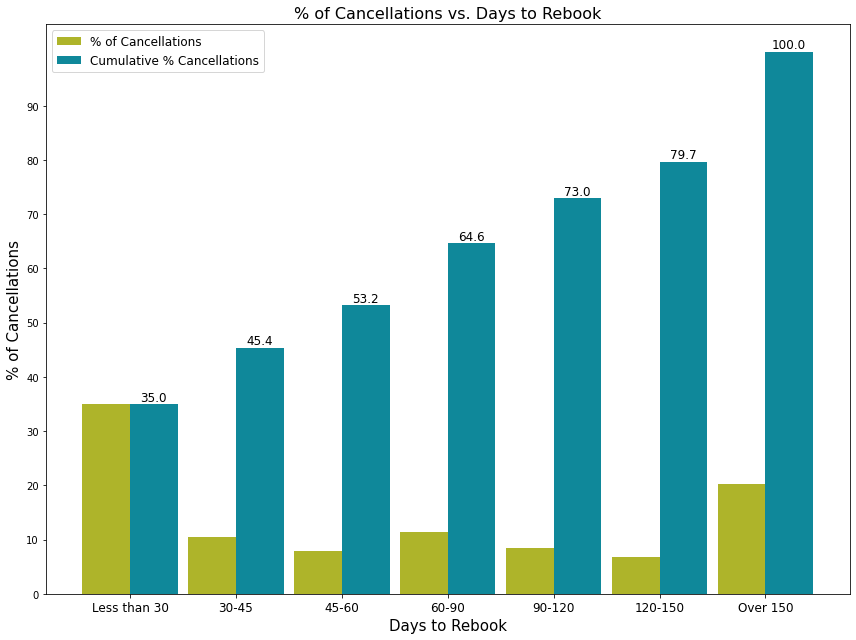

In [181]:
fig = plt.figure(figsize = (12,9))
plt.title("% of Cancellations vs. Days to Rebook", fontsize = 16)
width = .45
p1 = plt.bar(np.arange(7), [x*100 for x in values_perc], -width, align='edge', color='#AEB42A', label='% of Cancellations')
p2 = plt.bar(np.arange(7), [x*100 for x in np.cumsum(values_perc)], +width, align="edge", color = '#0F889A', \
          label = "Cumulative % Cancellations")

plt.xticks(np.arange(7), ['Less than 30', '30-45', '45-60', '60-90', '90-120', '120-150', 'Over 150'], fontsize=12)
plt.yticks(np.arange(0,100,10))
plt.ylabel("% of Cancellations", fontsize = 15)
plt.xlabel("Days to Rebook", fontsize = 15)
plt.bar_label(p2, fmt='%.1f', fontsize=12)

plt.legend(loc='upper left', fontsize=12)
plt.tight_layout()
plt.show()

> This shows us when the majority of cancellations occur. It leads to the idea of 'good' cancellations as opposed to 'bad' cancellations. 'Good' cancellations occur before 60 days before arrival date whereas 'bad' cancellations occur withing that 60 day window. These are 'bad' because of the problematic nature of rebooking they create. Less time to rebook means less chance those rooms will end up occupied. 